In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
root_dir = os.getcwd()
passenger_dir = os.path.join(root_dir, 'passenger_records')

In [3]:
passenger_records = []
passenger_stats = []

for file in os.listdir(passenger_dir):
    if file.endswith('.csv'):
        df = pd.read_csv(os.path.join(passenger_dir, file))
        avg_wait_time = df['WaitTime'].mean()
        max_wait_time = df['WaitTime'].max()
        min_wait_time = df['WaitTime'].min()
        q1_wait_time = df['WaitTime'].quantile(0.25)
        q3_wait_time = df['WaitTime'].quantile(0.75)
        
        
        profile, reposition_mode = file.replace('.csv','').split('_reposition_')
        df['profile'] = profile
        density , _ , rise , _ = profile.split('_')
        df['density'] = density
        df['rise'] = rise
        
        df['reposition_mode'] = reposition_mode
        passenger_stats.append({
            'profile': profile,
            'density': density,
            'rise': rise,
            'reposition_mode': reposition_mode,
            'AvgWaitTime': avg_wait_time,
            'Q1WaitTime': q1_wait_time,
            'Q3WaitTime': q3_wait_time,
            'MaxWaitTime': max_wait_time,
            'MinWaitTime': min_wait_time
        })
        passenger_records.append(df[['profile','density','rise','reposition_mode','WaitTime']])

passenger_records_df = pd.concat(passenger_records, ignore_index=True)
passenger_stats = pd.DataFrame(passenger_stats)
passenger_stats

,profile,density,rise,reposition_mode,AvgWaitTime,Q1WaitTime,Q3WaitTime,MaxWaitTime,MinWaitTime
0,high_dense_high_rise,high,high,none,41.855644,17.0,53.0,1271.0,1.0
1,high_dense_high_rise,high,high,tcn_balance,41.970315,17.0,53.0,1271.0,1.0
2,high_dense_high_rise,high,high,tcn_best_precision,41.843768,17.0,53.0,1271.0,1.0
3,high_dense_high_rise,high,high,tcn_best_recall,41.901988,17.0,54.0,1271.0,1.0
4,high_dense_high_rise,high,high,tsai,42.283599,17.0,53.0,1271.0,1.0
5,high_dense_low_rise,high,low,none,16.054379,8.0,23.0,100.0,1.0
6,high_dense_low_rise,high,low,tcn_balance,15.904713,7.0,23.0,100.0,1.0
7,high_dense_low_rise,high,low,tcn_best_precision,15.716343,6.0,23.0,119.0,1.0
8,high_dense_low_rise,high,low,tcn_best_recall,15.907370,7.0,23.0,100.0,1.0
9,high_dense_low_rise,high,low,tsai,15.690159,5.0,23.0,100.0,1.0


In [4]:
passenger_grouped = passenger_stats.groupby('reposition_mode')['AvgWaitTime'].mean()
passenger_grouped

reposition_mode
none                  26.943927
tcn_balance           26.760411
tcn_best_precision    26.654465
tcn_best_recall       26.776407
tsai                  26.778851
Name: AvgWaitTime, dtype: float64

In [5]:

passenger_grouped['none'] - passenger_grouped

reposition_mode
none                  0.000000
tcn_balance           0.183517
tcn_best_precision    0.289462
tcn_best_recall       0.167520
tsai                  0.165076
Name: AvgWaitTime, dtype: float64

In [6]:
(passenger_grouped['none'] - passenger_grouped)/passenger_grouped['none'] * 100

reposition_mode
none                  0.000000
tcn_balance           0.681106
tcn_best_precision    1.074313
tcn_best_recall       0.621736
tsai                  0.612665
Name: AvgWaitTime, dtype: float64

In [7]:
def delta_calculate(df):
    baseline = df[df['reposition_mode']=='none'][['profile','AvgWaitTime']]
    for row in baseline.itertuples():
        profile = row.profile
        base_await = row.AvgWaitTime
        df.loc[(df['profile']==profile),'delta_AWT'] = base_await - df['AvgWaitTime']
        df.loc[(df['profile']==profile),'pct_delta_AWT'] = df['delta_AWT']/ base_await * 100
    return df

passenger_stats = delta_calculate(passenger_stats)
passenger_stats[passenger_stats['profile']== 'low_dense_low_rise'][['profile','reposition_mode','AvgWaitTime','delta_AWT','pct_delta_AWT']]

,profile,reposition_mode,AvgWaitTime,delta_AWT,pct_delta_AWT
15,low_dense_low_rise,none,14.820633,0.000000,0.000000
16,low_dense_low_rise,tcn_balance,14.220871,0.599762,4.046803
17,low_dense_low_rise,tcn_best_precision,14.165811,0.654822,4.418312
18,low_dense_low_rise,tcn_best_recall,14.327336,0.493297,3.328446
19,low_dense_low_rise,tsai,14.263843,0.556790,3.756860


In [8]:
passenger_stats[passenger_stats['profile']== 'high_dense_low_rise'][['profile','reposition_mode','AvgWaitTime','delta_AWT','pct_delta_AWT']]

,profile,reposition_mode,AvgWaitTime,delta_AWT,pct_delta_AWT
5,high_dense_low_rise,none,16.054379,0.000000,0.000000
6,high_dense_low_rise,tcn_balance,15.904713,0.149666,0.932243
7,high_dense_low_rise,tcn_best_precision,15.716343,0.338036,2.105566
8,high_dense_low_rise,tcn_best_recall,15.907370,0.147008,0.915689
9,high_dense_low_rise,tsai,15.690159,0.364220,2.268664


In [9]:
passenger_stats[passenger_stats['profile']== 'low_dense_high_rise'][['profile','reposition_mode','AvgWaitTime','delta_AWT','pct_delta_AWT']]

,profile,reposition_mode,AvgWaitTime,delta_AWT,pct_delta_AWT
10,low_dense_high_rise,none,35.045053,0.000000,0.000000
11,low_dense_high_rise,tcn_balance,34.945744,0.099310,0.283377
12,low_dense_high_rise,tcn_best_precision,34.891939,0.153114,0.436907
13,low_dense_high_rise,tcn_best_recall,34.968934,0.076119,0.217205
14,low_dense_high_rise,tsai,34.877805,0.167248,0.477238


In [10]:
passenger_stats[passenger_stats['profile']== 'high_dense_high_rise'][['profile','reposition_mode','AvgWaitTime','delta_AWT','pct_delta_AWT']]

,profile,reposition_mode,AvgWaitTime,delta_AWT,pct_delta_AWT
0,high_dense_high_rise,none,41.855644,0.000000,0.000000
1,high_dense_high_rise,tcn_balance,41.970315,-0.114671,-0.273967
2,high_dense_high_rise,tcn_best_precision,41.843768,0.011877,0.028375
3,high_dense_high_rise,tcn_best_recall,41.901988,-0.046344,-0.110722
4,high_dense_high_rise,tsai,42.283599,-0.427954,-1.022453


Text(0.5, 1.05, 'Passenger Waiting Time by Reposition Mode')

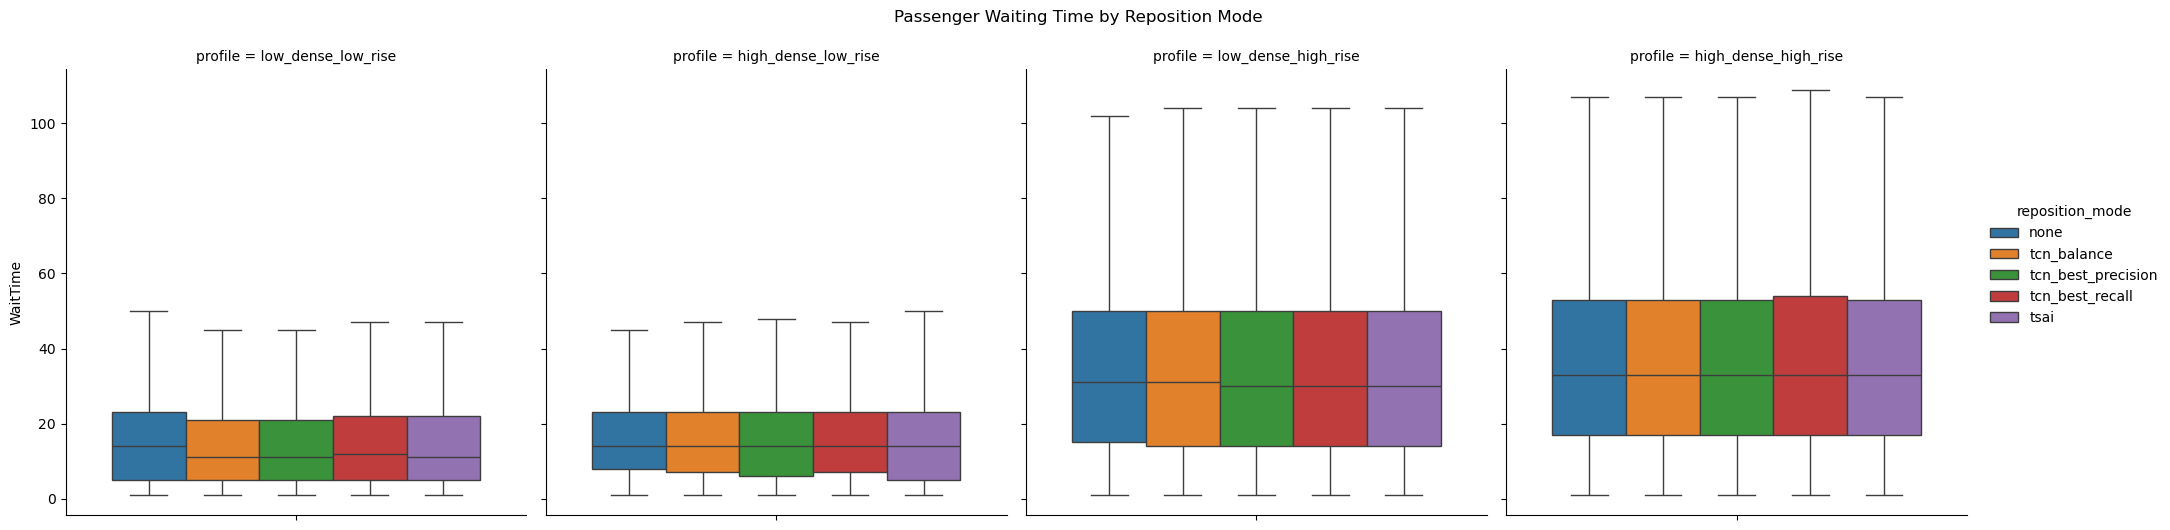

In [11]:
sns.catplot(data=passenger_records_df, 
            y='WaitTime', 
            hue='reposition_mode', 
            kind='box',
            col = 'profile',
            col_order = ['low_dense_low_rise','high_dense_low_rise', 'low_dense_high_rise','high_dense_high_rise'],
            showfliers=False)
plt.suptitle('Passenger Waiting Time by Reposition Mode', y=1.05)

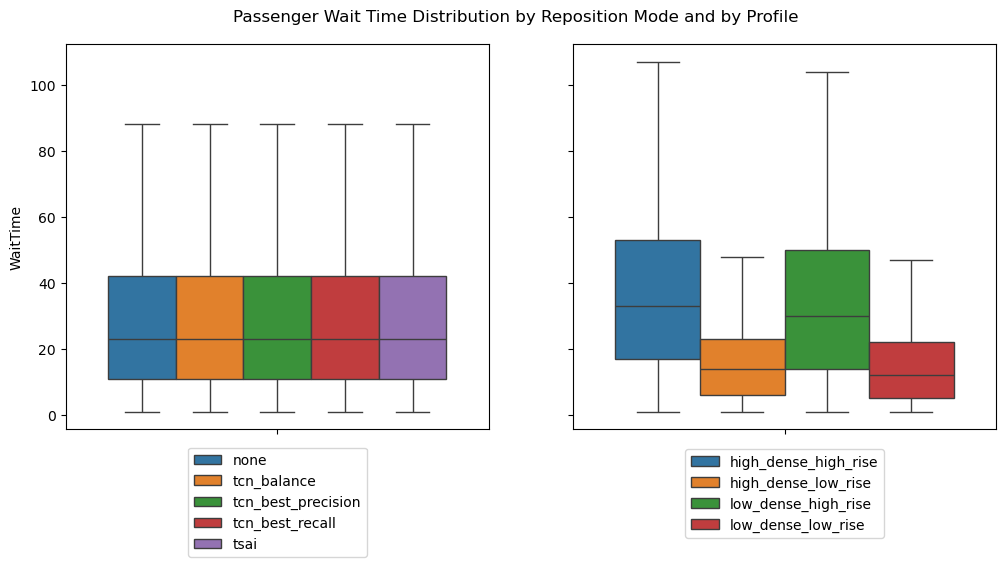

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
sns.boxplot(data=passenger_records_df, hue='reposition_mode', y='WaitTime', ax=axes[0],showfliers=False)
axes[0].legend(
    loc='lower center',
    bbox_to_anchor=(0.5, -0.35)
)
sns.boxplot(data=passenger_records_df, hue='profile', y='WaitTime', ax=axes[1],showfliers=False)
axes[1].legend(
    loc='lower center',
    bbox_to_anchor=(0.5, -0.3)
)
plt.suptitle('Passenger Wait Time Distribution by Reposition Mode and by Profile', y=0.95)
plt.show()

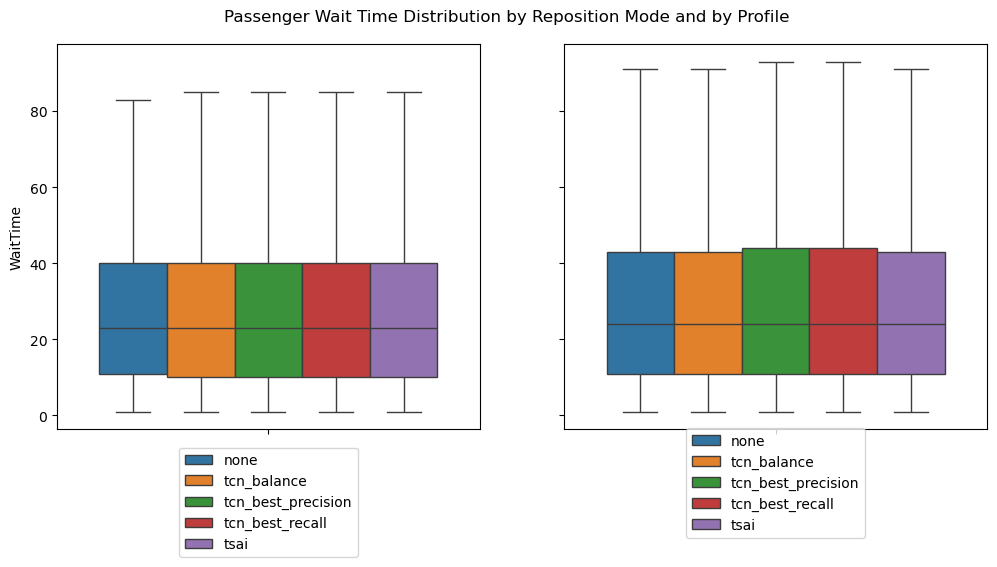

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
sns.boxplot(data=passenger_records_df[passenger_records_df['density']=='low'], hue='reposition_mode', y='WaitTime', ax=axes[0],showfliers=False)
axes[0].legend(
    loc='lower center',
    bbox_to_anchor=(0.5, -0.35)
)
sns.boxplot(data=passenger_records_df[passenger_records_df['density']=='high'], hue='reposition_mode', y='WaitTime', ax=axes[1],showfliers=False)
axes[1].legend(
    loc='lower center',
    bbox_to_anchor=(0.5, -0.3)
)
plt.suptitle('Passenger Wait Time Distribution by Reposition Mode and by Profile', y=0.95)
plt.show()


In [14]:
movement_log_dir = os.path.join(root_dir, 'movement_logs')
movement_stats = []
movement_logs = []

for file in os.listdir(movement_log_dir):
    if file.endswith('.csv'):
        df = pd.read_csv(os.path.join(movement_log_dir, file))
        total_movements_counts = len(df[df['EndTimestamp'].notnull()])
        total_movements_distance = abs(df['ToFloor'][df['EndTimestamp'].notnull()] - df['FromFloor'][df['EndTimestamp'].notnull()]).sum()
        idle_repositions_counts = len(df[(df['MoveType'] == 'idle_reposition') & (df['EndTimestamp'].notnull())])
        idle_repositions_distance = abs(df['ToFloor'][(df['MoveType'] == 'idle_reposition') & (df['EndTimestamp'].notnull())] - df['FromFloor'][(df['MoveType'] == 'idle_reposition') & (df['EndTimestamp'].notnull())]).sum()
        call_counts = len(df[(df['MoveType'] == 'pickup') & (df['EndTimestamp'].notnull())])
        
        profile, reposition_mode = file.replace('.csv','').split('_reposition_')

        movement_stats.append({
            'profile': profile,
            'reposition_mode': reposition_mode,
            'TotalMovementsCounts': total_movements_counts,
            'TotalMovementsDistance': total_movements_distance,
            'IdleRepositionsCounts': idle_repositions_counts,
            'IdleRepositionsDistance': idle_repositions_distance,
            'CallCounts': call_counts
        })

movement_stats = pd.DataFrame(movement_stats)
movement_stats

,profile,reposition_mode,TotalMovementsCounts,TotalMovementsDistance,IdleRepositionsCounts,IdleRepositionsDistance,CallCounts
0,high_dense_high_rise,none,81750,525745,0,0,42930
1,high_dense_high_rise,tcn_balance,82573,535074,808,10017,43005
2,high_dense_high_rise,tcn_best_precision,82425,532014,574,6939,43060
3,high_dense_high_rise,tcn_best_recall,82621,534736,820,10132,43003
4,high_dense_high_rise,tsai,82613,531975,771,8664,43076
5,high_dense_low_rise,none,52257,225420,0,0,26211
6,high_dense_low_rise,tcn_balance,53178,227744,861,3560,26260
7,high_dense_low_rise,tcn_best_precision,53845,231238,1421,8448,26337
8,high_dense_low_rise,tcn_best_recall,53212,228216,900,3782,26247
9,high_dense_low_rise,tsai,54228,233268,1805,10721,26358


In [15]:
idle_stats = []

def idle_statistic(df):
    idle_stat = []
    df = df[df['EndTimestamp'].notnull()].reset_index(drop=True)
    idle_repositions = df[df['MoveType'] == 'idle_reposition']
    for i in idle_repositions.index.tolist():        
        elevator_id = idle_repositions.loc[i,'ElevatorID']
        idle_reposition_from = idle_repositions.loc[i,'FromFloor']
        idle_reposition_to = idle_repositions.loc[i,'ToFloor']
        idle_reposition_start_time = pd.to_datetime(idle_repositions.loc[i,'StartTimestamp'])
        idle_reposition_end_time = pd.to_datetime(idle_repositions.loc[i,'EndTimestamp'])
        
        reposition_elevaotr_called = False
        reposition_elevator_called_time = None
        reposition_elevator_called_floor = None
        estimated_save_waiting_time = None
        reposition_called_time = None
        eswt_percent = None
        
        index = 1
        while True:
            if (i+index >= len(df)-1):
                reposition_elevator_called = False
                reposition_elevator_called_time = None
                reposition_elevator_called_floor = None
                estimated_save_waiting_time = None
                reposition_called_time = None
                eswt_percent = None
                break
            
            if (pd.to_datetime(df.loc[i+index,'StartTimestamp']) - idle_reposition_end_time)/ pd.Timedelta(minutes=1) > 5:
                reposition_elevaotr_called = False
                reposition_elevator_called_time = None
                reposition_elevator_called_floor = None
                estimated_save_waiting_time = None
                reposition_called_time = None
                eswt_percent = None
                break
            
            if df.loc[i+index,'ElevatorID'] == elevator_id:
                if df.loc[i+index,'MoveType'] == 'idle_reposition':
                    reposition_elevaotr_called = False
                    reposition_elevator_called_time = None
                    reposition_elevator_called_floor = None
                    estimated_save_waiting_time = None
                    reposition_called_time = None
                    eswt_percent = None
                    break
                elif df.loc[i+index,'MoveType'] == 'pickup':
                    reposition_elevaotr_called = True
                    reposition_elevator_called_time = pd.to_datetime(df.loc[i+index,'StartTimestamp'])
                    reposition_elevator_called_floor = df.loc[i+index,'FromFloor']
                    estimated_save_waiting_time = (abs(int(idle_reposition_from) - int(reposition_elevator_called_floor))- abs(int(idle_reposition_to) - int(reposition_elevator_called_floor)))*3
                    reposition_called_time =abs(idle_reposition_start_time - reposition_elevator_called_time) / pd.Timedelta(seconds=1)
                    if estimated_save_waiting_time >0:
                        eswt_percent = (estimated_save_waiting_time / (abs(int(idle_reposition_from) - int(reposition_elevator_called_floor))*3)) *100
                    else:
                        eswt_percent = None
                    break
            index += 1

        idle_stat.append({
            'ElevatorID': elevator_id,
            'IdleRepositionFrom': idle_reposition_from,
            'IdleRepositionTo': idle_reposition_to,
            'IdleRepositionStartTime': idle_reposition_start_time,
            'IdleRepositionEndTime': idle_reposition_end_time,
            'RepositionElevatorCalled': reposition_elevaotr_called,
            'RepositionElevatorCalledTime': reposition_elevator_called_time,
            'RepositionElevatorCalledFloor': reposition_elevator_called_floor,
            'EstimatedSaveWaitingTime(s)': estimated_save_waiting_time,
            'Reposition-CalledTime(s)': reposition_called_time,
            'eswt_percent': eswt_percent
        })
    return pd.DataFrame(idle_stat)

for file in os.listdir(movement_log_dir):
    if file.endswith('.csv') and 'none' not in file:
        df = pd.read_csv(os.path.join(movement_log_dir, file))
        profile, reposition_mode = file.replace('.csv','').split('_reposition_')
        stat_df = idle_statistic(df)
        stat_df['profile'] = profile
        stat_df['reposition_mode'] = reposition_mode
        idle_stats.append(stat_df)
        
idle_stats = pd.concat(idle_stats, ignore_index=True)
idle_stats

,ElevatorID,IdleRepositionFrom,IdleRepositionTo,IdleRepositionStartTime,IdleRepositionEndTime,RepositionElevatorCalled,RepositionElevatorCalledTime,RepositionElevatorCalledFloor,EstimatedSaveWaitingTime(s),Reposition-CalledTime(s),eswt_percent,profile,reposition_mode
0,2,5,0,2025-03-14 00:20:52,2025-03-14 00:21:07,False,NaT,NaN,NaN,NaN,NaN,high_dense_high_rise,tcn_balance
1,1,9,0,2025-03-14 00:20:52,2025-03-14 00:21:19,True,2025-03-14 00:22:40,0.0,27.0,108.0,100.0,high_dense_high_rise,tcn_balance
2,1,11,0,2025-03-14 00:32:57,2025-03-14 00:33:30,False,NaT,NaN,NaN,NaN,NaN,high_dense_high_rise,tcn_balance
3,1,14,0,2025-03-14 00:57:06,2025-03-14 00:57:48,False,NaT,NaN,NaN,NaN,NaN,high_dense_high_rise,tcn_balance
4,1,11,0,2025-03-14 10:13:10,2025-03-14 10:13:43,True,2025-03-14 10:14:26,0.0,33.0,76.0,100.0,high_dense_high_rise,tcn_balance
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21494,1,5,0,2025-03-31 23:39:59,2025-03-31 23:40:14,False,NaT,NaN,NaN,NaN,NaN,low_dense_low_rise,tsai
21495,1,8,0,2025-03-31 23:52:05,2025-03-31 23:52:29,False,NaT,NaN,NaN,NaN,NaN,low_dense_low_rise,tsai
21496,1,5,0,2025-04-01 00:04:11,2025-04-01 00:04:26,True,2025-04-01 00:09:18,0.0,15.0,307.0,100.0,low_dense_low_rise,tsai
21497,2,3,0,2025-04-01 00:16:18,2025-04-01 00:16:27,False,NaT,NaN,NaN,NaN,NaN,low_dense_low_rise,tsai


In [16]:
idle_stats['reposition_mode'].value_counts()

reposition_mode
tsai                  5672
tcn_best_recall       5495
tcn_balance           5197
tcn_best_precision    5135
Name: count, dtype: int64

In [17]:
idle_stats[idle_stats['reposition_mode'] != 'tsai'][['EstimatedSaveWaitingTime(s)','eswt_percent']].mean()

EstimatedSaveWaitingTime(s)    20.918697
eswt_percent                   99.949620
dtype: float64

In [18]:
idle_stats.groupby('reposition_mode')[['EstimatedSaveWaitingTime(s)','eswt_percent']].mean()

,EstimatedSaveWaitingTime(s),eswt_percent
reposition_mode,,
tcn_balance,20.763139,99.929189
tcn_best_precision,22.749772,99.942632
tcn_best_recall,19.272199,99.976036
tsai,23.304178,100.000000


In [19]:
idle_stats

,ElevatorID,IdleRepositionFrom,IdleRepositionTo,IdleRepositionStartTime,IdleRepositionEndTime,RepositionElevatorCalled,RepositionElevatorCalledTime,RepositionElevatorCalledFloor,EstimatedSaveWaitingTime(s),Reposition-CalledTime(s),eswt_percent,profile,reposition_mode
0,2,5,0,2025-03-14 00:20:52,2025-03-14 00:21:07,False,NaT,NaN,NaN,NaN,NaN,high_dense_high_rise,tcn_balance
1,1,9,0,2025-03-14 00:20:52,2025-03-14 00:21:19,True,2025-03-14 00:22:40,0.0,27.0,108.0,100.0,high_dense_high_rise,tcn_balance
2,1,11,0,2025-03-14 00:32:57,2025-03-14 00:33:30,False,NaT,NaN,NaN,NaN,NaN,high_dense_high_rise,tcn_balance
3,1,14,0,2025-03-14 00:57:06,2025-03-14 00:57:48,False,NaT,NaN,NaN,NaN,NaN,high_dense_high_rise,tcn_balance
4,1,11,0,2025-03-14 10:13:10,2025-03-14 10:13:43,True,2025-03-14 10:14:26,0.0,33.0,76.0,100.0,high_dense_high_rise,tcn_balance
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21494,1,5,0,2025-03-31 23:39:59,2025-03-31 23:40:14,False,NaT,NaN,NaN,NaN,NaN,low_dense_low_rise,tsai
21495,1,8,0,2025-03-31 23:52:05,2025-03-31 23:52:29,False,NaT,NaN,NaN,NaN,NaN,low_dense_low_rise,tsai
21496,1,5,0,2025-04-01 00:04:11,2025-04-01 00:04:26,True,2025-04-01 00:09:18,0.0,15.0,307.0,100.0,low_dense_low_rise,tsai
21497,2,3,0,2025-04-01 00:16:18,2025-04-01 00:16:27,False,NaT,NaN,NaN,NaN,NaN,low_dense_low_rise,tsai


In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


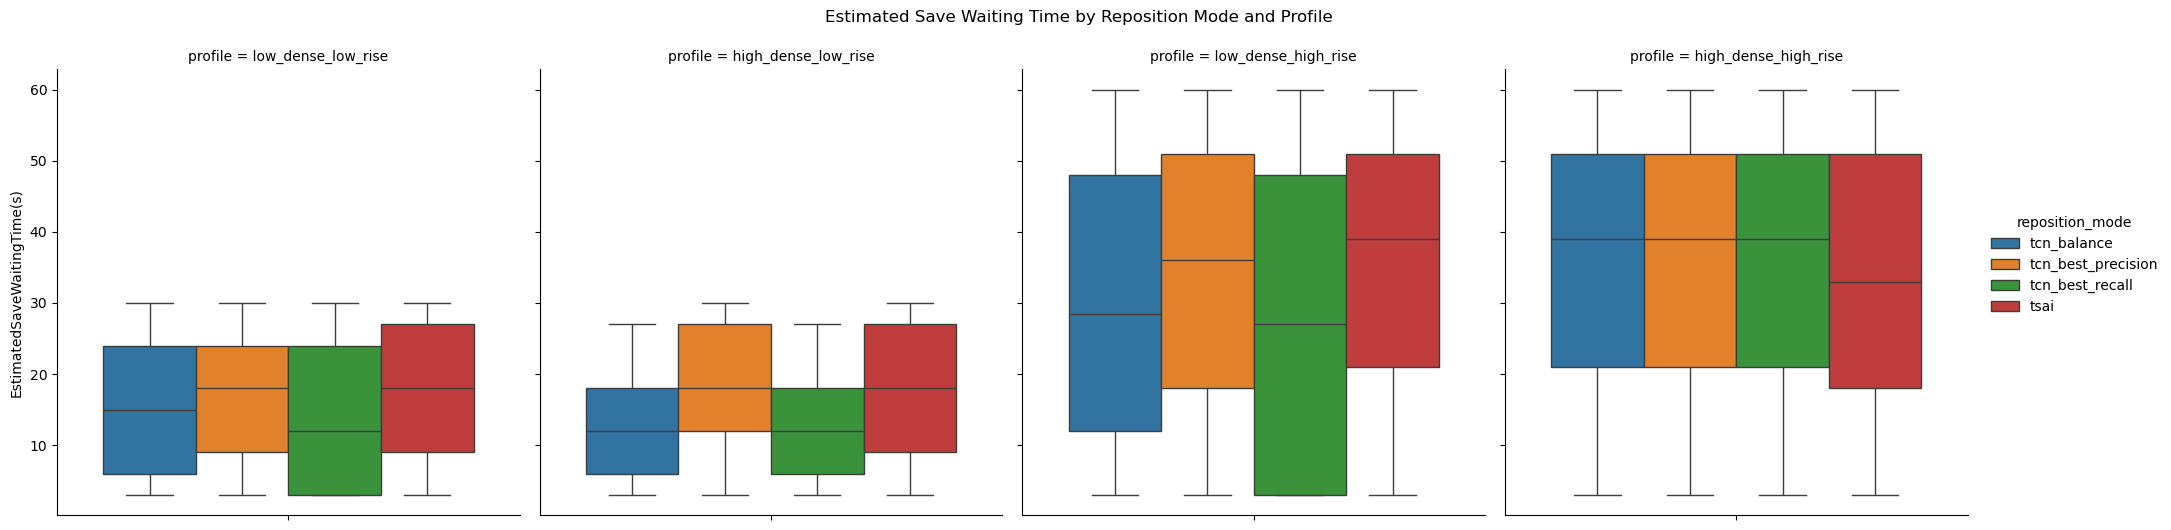

In [21]:
sns.catplot(
    data = idle_stats,
    y = 'EstimatedSaveWaitingTime(s)',
    hue = 'reposition_mode',
    col = 'profile',
    col_order = ['low_dense_low_rise','high_dense_low_rise', 'low_dense_high_rise','high_dense_high_rise'],
    kind = 'box'
)
plt.suptitle('Estimated Save Waiting Time by Reposition Mode and Profile', y=1.05)
plt.show()

In [22]:
idle_stats.groupby('reposition_mode')['EstimatedSaveWaitingTime(s)'].agg(['mean','median','max','min','std'])

,mean,median,max,min,std
reposition_mode,,,,,
tcn_balance,20.763139,18.0,60.0,3.0,15.615771
tcn_best_precision,22.749772,21.0,60.0,3.0,14.942299
tcn_best_recall,19.272199,15.0,60.0,3.0,16.327806
tsai,23.304178,21.0,60.0,3.0,15.079919


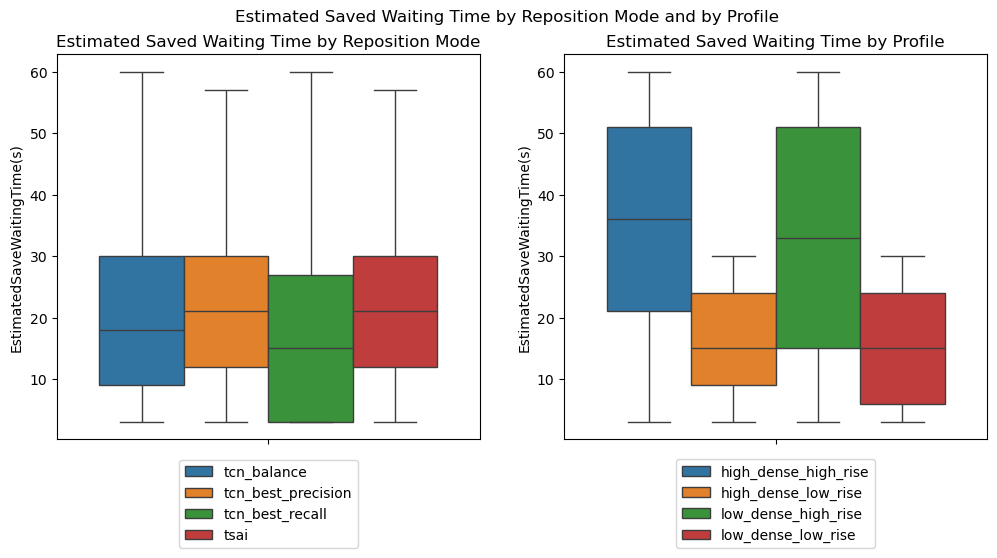

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=False)
sns.boxplot(data=idle_stats,
            hue='reposition_mode',
            y= 'EstimatedSaveWaitingTime(s)',
            showfliers=False,
            ax=axes[0])
axes[0].set_title('Estimated Saved Waiting Time by Reposition Mode')
axes[0].legend(
    loc='lower center',
    bbox_to_anchor=(0.5, -0.3),
)
sns.boxplot(data=idle_stats,
            hue='profile',
            y= 'EstimatedSaveWaitingTime(s)'
            ,ax=axes[1])
axes[1].set_title('Estimated Saved Waiting Time by Profile')
axes[1].legend(
    loc='lower center',
    bbox_to_anchor=(0.5, -0.3)
)
plt.suptitle('Estimated Saved Waiting Time by Reposition Mode and by Profile', y=0.97)
plt.show()

In [24]:
grouped_count_by_reposition_mode = idle_stats.groupby('reposition_mode')['RepositionElevatorCalled'].value_counts().unstack(fill_value=0).reset_index()
grouped_count_by_reposition_mode['total'] = grouped_count_by_reposition_mode[True] +grouped_count_by_reposition_mode[False]
grouped_count_by_reposition_mode['ratio'] = grouped_count_by_reposition_mode[True] / (grouped_count_by_reposition_mode[True] +grouped_count_by_reposition_mode[False])
grouped_count_by_reposition_mode

RepositionElevatorCalled,reposition_mode,False,True,total,ratio
0,tcn_balance,916,4281,5197,0.823744
1,tcn_best_precision,751,4384,5135,0.853749
2,tcn_best_recall,1024,4471,5495,0.813649
3,tsai,813,4859,5672,0.856664


In [25]:
grouped_count_by_reposition_mode[True].values.tolist()

[4281, 4384, 4471, 4859]

C:\Users\yeech\AppData\Local\Temp\ipykernel_19988\2287567580.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
C:\Users\yeech\AppData\Local\Temp\ipykernel_19988\2287567580.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)


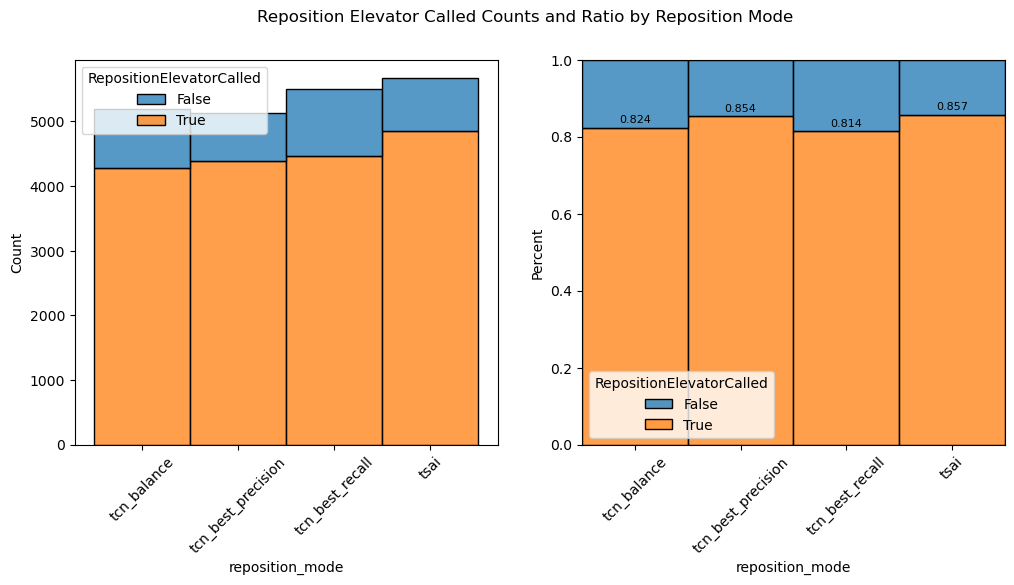

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(
    data=idle_stats,
    hue='RepositionElevatorCalled',
    hue_order=[False, True], 
    multiple='stack',
    stat='count',
    x='reposition_mode',
    ax=axes[0]
)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
ax = sns.histplot(
    data=idle_stats,
    x='reposition_mode',
    hue='RepositionElevatorCalled',
    multiple='fill',
    stat='percent', ax=axes[1]
)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
    # add annotations
for i,c in enumerate(ax.containers):
    if i == 1:
        continue  # skip the first container (False bars)
    # custom label calculates percent and add an empty string so 0 value bars don't have a number
    labels = [f'{r}' for r in grouped_count_by_reposition_mode['ratio'].round(3).values.tolist()]

    ax.bar_label(c, labels=labels, label_type='edge', fontsize=8, padding=2)

ax.margins(y=0.2)

plt.suptitle('Reposition Elevator Called Counts and Ratio by Reposition Mode')
plt.show()

In [27]:
grouped_count_by_profile = idle_stats.groupby('profile')['RepositionElevatorCalled'].value_counts().unstack(fill_value=0)
grouped_count_by_profile['total'] = grouped_count_by_profile[True] +grouped_count_by_profile[False]
grouped_count_by_profile['ratio'] = grouped_count_by_profile[True] / (grouped_count_by_profile[True] +grouped_count_by_profile[False])
grouped_count_by_profile

RepositionElevatorCalled,False,True,total,ratio
profile,,,,
high_dense_high_rise,970,2003,2973,0.673730
high_dense_low_rise,536,4451,4987,0.892521
low_dense_high_rise,593,4095,4688,0.873507
low_dense_low_rise,1405,7446,8851,0.841261


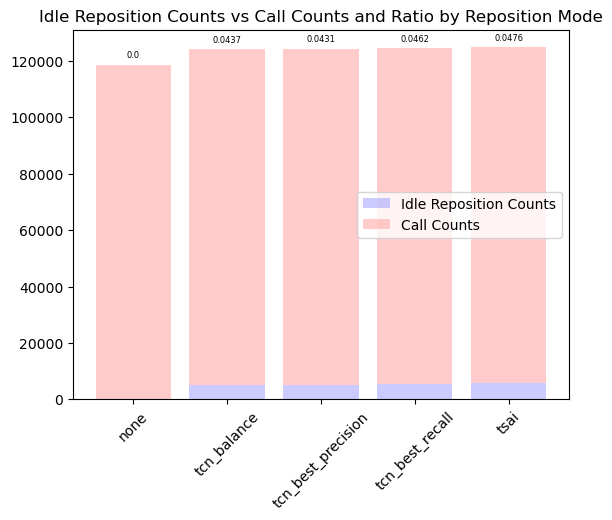

In [28]:

# reposition count vs call count
group_by_reposition_mode = movement_stats.groupby('reposition_mode')
X = group_by_reposition_mode.groups.keys()
Y1 = group_by_reposition_mode['IdleRepositionsCounts'].sum()
Y2 = group_by_reposition_mode['CallCounts'].sum()
plt.figure()
plt.bar(X, Y1,color='#9999ff', alpha=0.5, edgecolor='None')
plt.bar(X, Y2, color='#ff9999', alpha=0.5, edgecolor='None',bottom=Y1) 

ratio = [y1/y2 for y1, y2 in zip(Y1, Y2)]
for x,y1,y2,r in zip(X, Y1,Y2,ratio):
    plt.text(x, y1+y2+5000, str(round(r,4)), ha='center', va='top', fontsize=6, color='black')

plt.xticks(plt.xticks()[0], rotation=45)
plt.title('Idle Reposition Counts vs Call Counts and Ratio by Reposition Mode')
plt.legend(['Idle Reposition Counts','Call Counts'])
plt.show()

C:\Users\yeech\AppData\Local\Temp\ipykernel_19988\3018394000.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
C:\Users\yeech\AppData\Local\Temp\ipykernel_19988\3018394000.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)


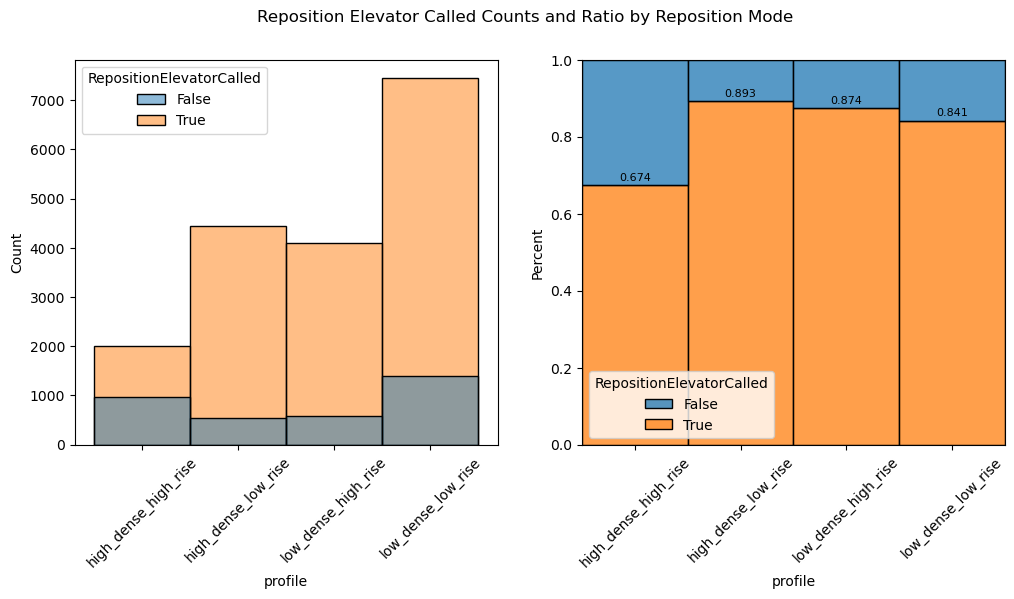

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data=idle_stats, hue='RepositionElevatorCalled', x='profile', ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
ax = sns.histplot(
    data=idle_stats,
    x='profile',
    hue='RepositionElevatorCalled',
    multiple='fill',
    stat='percent', ax=axes[1]
)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
    # add annotations
for i,c in enumerate(ax.containers):
    if i == 1:
        continue  # skip the first container (False bars)
    # custom label calculates percent and add an empty string so 0 value bars don't have a number
    labels = [f'{r}' for r in grouped_count_by_profile['ratio'].round(3).values.tolist()]

    ax.bar_label(c, labels=labels, label_type='edge', fontsize=8, padding=2)

ax.margins(y=0.2)

plt.suptitle('Reposition Elevator Called Counts and Ratio by Reposition Mode')
plt.show()

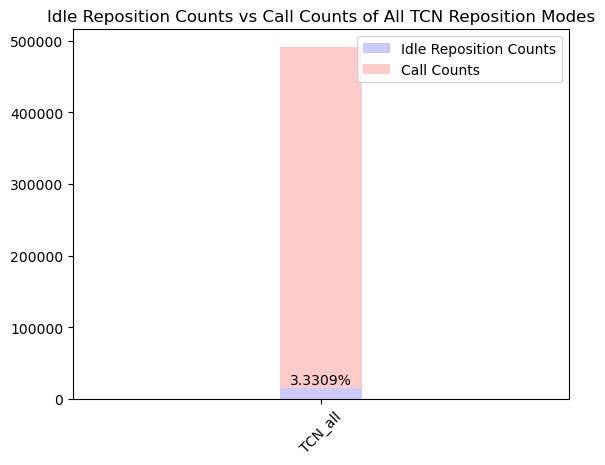

In [30]:
x = ['TCN_all']
y1 = movement_stats[movement_stats['reposition_mode'] != 'tsai']['IdleRepositionsCounts'].sum()
y2 = movement_stats[movement_stats['reposition_mode'] != 'tsai']['CallCounts'].sum()
plt.figure()
plt.bar(x, y1,color='#9999ff', alpha=0.5, edgecolor='None',width=0.1)
plt.bar(x, y2, color='#ff9999', alpha=0.5, edgecolor='None',bottom=y1,width=0.1) 

ratio = y1/y2 * 100
plt.text(x, y1+20000, str(round(ratio,4))+'%', ha='center', va='top', fontsize=10, color='black')

plt.xlim(-0.3, 0.3)
plt.xticks(plt.xticks()[0], rotation=45)
plt.title('Idle Reposition Counts vs Call Counts of All TCN Reposition Modes')
plt.legend(['Idle Reposition Counts','Call Counts'])
plt.show()

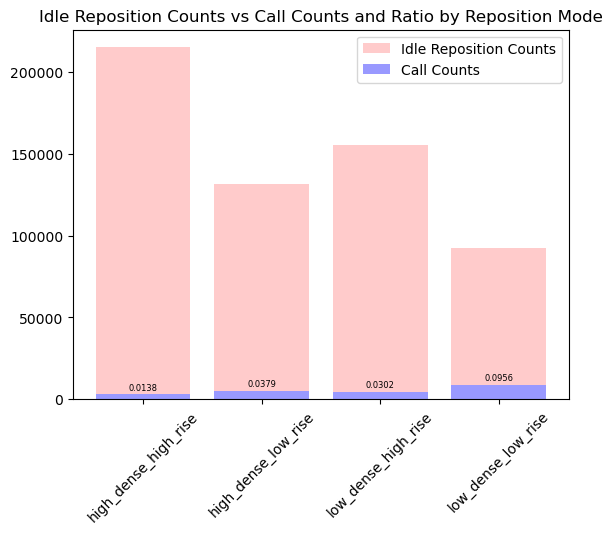

In [31]:
# reposition count vs call count
movement_grouped_by_profile = movement_stats.groupby('profile')
X = movement_grouped_by_profile.groups.keys()
Y1 = movement_grouped_by_profile['IdleRepositionsCounts'].sum()
Y2 = movement_grouped_by_profile['CallCounts'].sum()
plt.figure()
plt.bar(X, Y2, color='#ff9999', alpha=0.5, edgecolor='None') 
plt.bar(X, Y1,color='#9999ff', edgecolor='None')

ratio = [y1/y2 for y1, y2 in zip(Y1, Y2)]
for x,y1,y2,r in zip(X, Y1,Y2,ratio):
    plt.text(x, y1+7000, str(round(r,4)), ha='center', va='top', fontsize=6, color='black')

plt.xticks(plt.xticks()[0], rotation=45)
plt.title('Idle Reposition Counts vs Call Counts and Ratio by Reposition Mode')
plt.legend(['Idle Reposition Counts','Call Counts'])
plt.show()

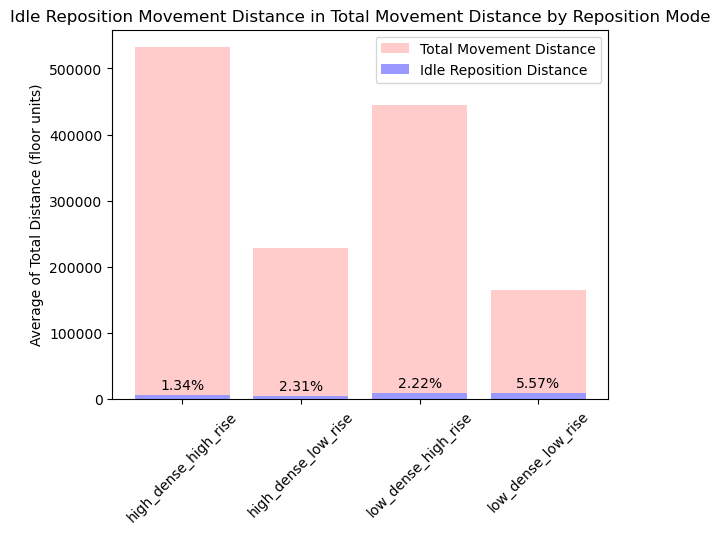

In [32]:

X = movement_grouped_by_profile.groups.keys()
Y1 = movement_grouped_by_profile['IdleRepositionsDistance'].mean()
Y2 = movement_grouped_by_profile['TotalMovementsDistance'].mean()
plt.figure()
plt.bar(X, Y2, color='#ff9999', alpha=0.5, edgecolor='None') 
plt.bar(X, Y1,color='#9999ff', edgecolor='None')

ratio = [y1/y2*100 for y1, y2 in zip(Y1, Y2)]
for x,y1,y2,r in zip(X, Y1,Y2,ratio):
    plt.text(x, y1+25000, str(round(r,2))+'%', ha='center', va='top', fontsize=10, color='black')

plt.ylabel('Average of Total Distance (floor units)')
plt.xticks(plt.xticks()[0], rotation=45)
plt.title('Idle Reposition Movement Distance in Total Movement Distance by Reposition Mode')
plt.legend(['Total Movement Distance','Idle Reposition Distance'])
plt.show()

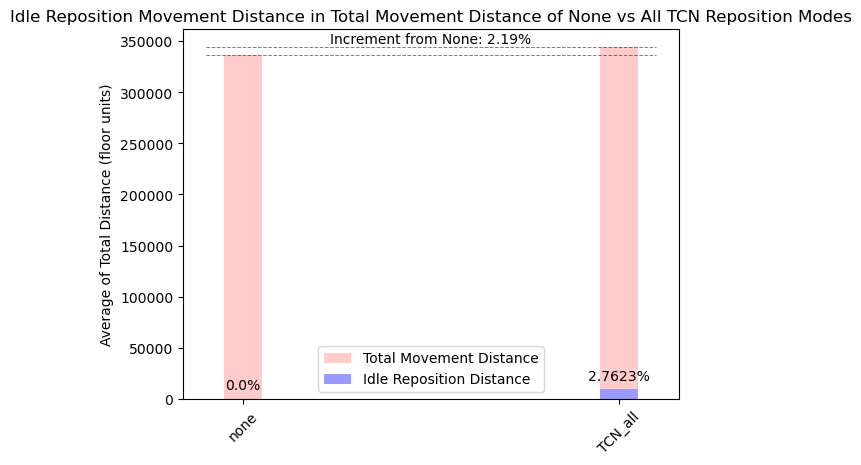

In [33]:
X = ['none','TCN_all']

y_tcn = movement_stats[(movement_stats['reposition_mode'] != 'tsai') & (movement_stats['reposition_mode'] != 'none')]

y1_tcn = y_tcn['IdleRepositionsDistance'].mean()
y2_tcn = y_tcn['TotalMovementsDistance'].mean()

y1_none = movement_stats[movement_stats['reposition_mode'] == 'none']['IdleRepositionsDistance'].mean()
y2_none = movement_stats[movement_stats['reposition_mode'] == 'none']['TotalMovementsDistance'].mean()

Y1 = [y1_none , y1_tcn]
Y2 = [y2_none , y2_tcn]
plt.figure()
plt.bar(X, Y2, color='#ff9999', alpha=0.5, edgecolor='None',width=0.1) 
plt.bar(X, Y1,color='#9999ff', edgecolor='None',width=0.1)

plt.legend(['Total Movement Distance','Idle Reposition Distance'])

plt.plot([-0.1,1.1], [Y2[0], Y2[0]], color='black', linestyle = '--',linewidth=0.7,alpha=0.5)
plt.plot([-0.1,1.1], [Y2[1], Y2[1]], color='black', linestyle = '--',linewidth=0.7,alpha=0.5)

increment = (Y2[1] - Y2[0]) / Y2[0] * 100
plt.text(0.5, Y2[1]+15000, 'Increment from None: '+str(round(increment,2))+'%', ha='center', va='top', fontsize=10, color='black')

ratio = [y1/y2 * 100 for y1, y2 in zip(Y1, Y2)]
for i, (r, y1) in enumerate(zip(ratio, Y1)):
    plt.text(i, y1+20000, str(round(r,4))+'%', ha='center', va='top', fontsize=10, color='black')

plt.ylabel('Average of Total Distance (floor units)')
plt.xticks(plt.xticks()[0], rotation=45)
plt.title('Idle Reposition Movement Distance in Total Movement Distance of None vs All TCN Reposition Modes')
plt.show()

In [ ]:
y_tcn = movement_stats[(movement_stats['reposition_mode'] != 'tsai') & (movement_stats['reposition_mode'] != 'none')]
y1_tcn = y_tcn['IdleRepositionsDistance'].mean()
y2_tcn = y_tcn['TotalMovementsDistance'].mean()
y1_none = movement_stats[movement_stats['reposition_mode'] == 'none']['IdleRepositionsDistance'].mean()
y2_none = movement_stats[movement_stats['reposition_mode'] == 'none']['TotalMovementsDistance'].mean()
y1 = [y1_none , y1_tcn]
y1

[0.0, 9506.0]

C:\Users\yeech\AppData\Local\Temp\ipykernel_19988\2753467125.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot([-1.5,4.7], [Y2[0], Y2[0]], color='black', linestyle = '--',linewidth=0.7,alpha=0.5)
C:\Users\yeech\AppData\Local\Temp\ipykernel_19988\2753467125.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  increment = (Y2[i] - Y2[0]) / Y2[0] * 100
C:\Users\yeech\AppData\Local\Temp\ipykernel_19988\2753467125.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a

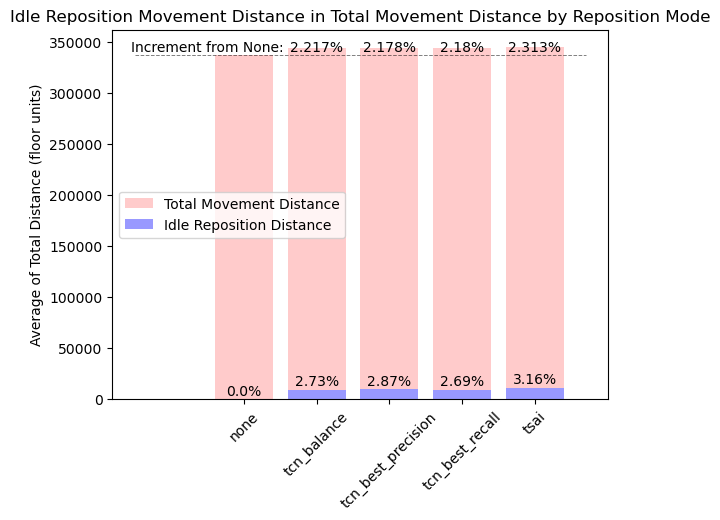

In [ ]:
movement_grouped_by_mode = movement_stats.groupby('reposition_mode')
X = movement_grouped_by_mode.groups.keys()
Y1 = movement_grouped_by_mode['IdleRepositionsDistance'].mean()
Y2 = movement_grouped_by_mode['TotalMovementsDistance'].mean()
plt.figure()
plt.bar(X, Y2, color='#ff9999', alpha=0.5, edgecolor='None') 
plt.bar(X, Y1,color='#9999ff', edgecolor='None')
plt.legend(['Total Movement Distance','Idle Reposition Distance'])
plt.plot([-1.5,4.7], [Y2[0], Y2[0]], color='black', linestyle = '--',linewidth=0.7,alpha=0.5)
for i in range(1, len(Y2)):
    increment = (Y2[i] - Y2[0]) / Y2[0] * 100
    plt.text(i, Y2[0]+15000, str(round(increment,3))+'%', ha='center', va='top', fontsize=10, color='black')
plt.text(-0.5, Y2[0]+15000, 'Increment from None:', ha='center', va='top', fontsize=10, color='black')
ratio = [y1/y2*100 for y1, y2 in zip(Y1, Y2)]
for x,y1,y2,r in zip(X, Y1,Y2,ratio):
    plt.text(x, y1+15000, str(round(r,2))+'%', ha='center', va='top', fontsize=10, color='black')
plt.xticks(plt.xticks()[0], rotation=45)
plt.ylabel('Average of Total Distance (floor units)')
plt.title('Idle Reposition Movement Distance in Total Movement Distance by Reposition Mode')
plt.show()

C:\Users\yeech\AppData\Local\Temp\ipykernel_19988\1251738409.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
C:\Users\yeech\AppData\Local\Temp\ipykernel_19988\1251738409.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
C:\Users\yeech\AppData\Local\Temp\ipykernel_19988\1251738409.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
C:\Users\yeech\AppData\Local\Temp\ipykernel_19988\1251738409.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xtic

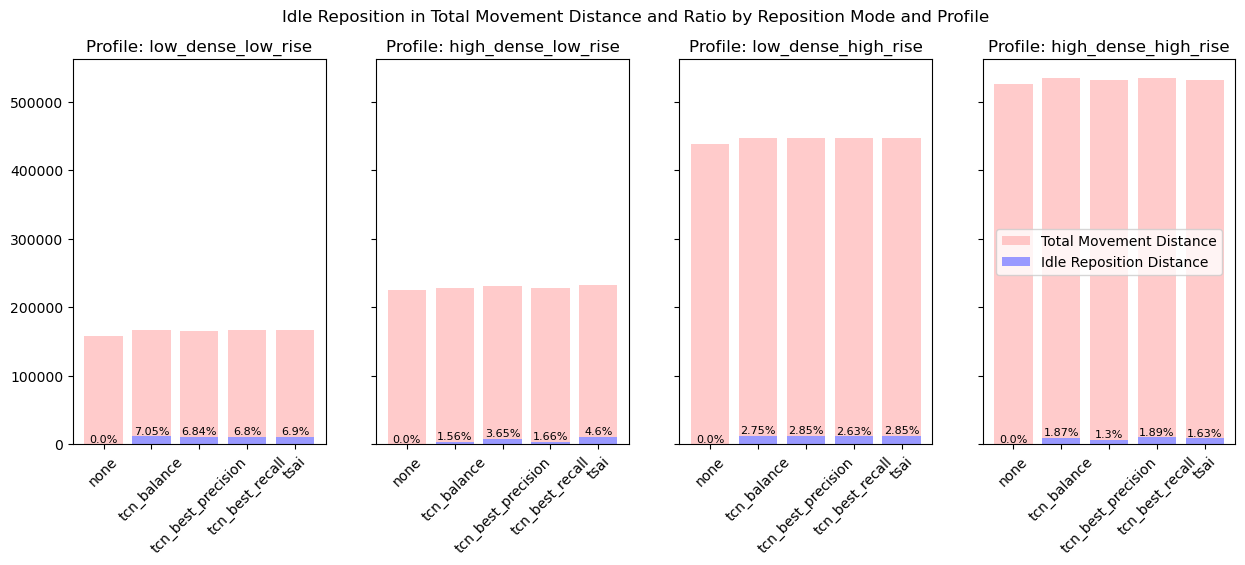

In [38]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharey=True)

for i, profile in enumerate(['low_dense_low_rise','high_dense_low_rise', 'low_dense_high_rise','high_dense_high_rise']):
    movement_grouped_by_mode = movement_stats[movement_stats['profile']==profile].groupby('reposition_mode')
    X = movement_grouped_by_mode.groups.keys()
    Y1 = movement_grouped_by_mode['IdleRepositionsDistance'].mean()
    Y2 = movement_grouped_by_mode['TotalMovementsDistance'].mean()
    axes[i].bar(X, Y2, color='#ff9999', alpha=0.5, edgecolor='None')
    axes[i].bar(X, Y1,color='#9999ff', edgecolor='None')

    ratio = [y1/y2*100 for y1, y2 in zip(Y1, Y2)]
    for x,y1,y2,r in zip(X, Y1,Y2,ratio):
        axes[i].text(x, y1+15000, str(round(r,2))+'%', ha='center', va='top', fontsize=8, color='black')

    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
    axes[i].set_title(f'Profile: {profile}')

plt.suptitle('Idle Reposition in Total Movement Distance and Ratio by Reposition Mode and Profile')
plt.legend(['Total Movement Distance','Idle Reposition Distance'],loc='center')
plt.show()

In [150]:
total_waiting_time = passenger_records_df.groupby(['reposition_mode'])['WaitTime'].sum().reset_index()

In [162]:
total_waiting_time['saved_time'] = total_waiting_time[total_waiting_time['reposition_mode']=='none']['WaitTime'].values - total_waiting_time[total_waiting_time['reposition_mode'] != 'none']['WaitTime']
total_waiting_time = total_waiting_time.drop(0)
total_waiting_time

,reposition_mode,WaitTime,saved_time,saved_time_per_reposition
1,tcn_balance,4681763.0,13697.0,NaN
2,tcn_best_precision,4665243.0,30217.0,NaN
3,tcn_best_recall,4680810.0,14650.0,NaN
4,tsai,4692375.0,3085.0,NaN


In [159]:
total_waiting_time.columns

Index(['reposition_mode', 'WaitTime', 'saved_time',
       'saved_time_per_reposition'],
      dtype='object')

In [160]:
grouped_count_by_reposition_mode.columns

Index(['reposition_mode', False, True, 'total', 'ratio'], dtype='object', name='RepositionElevatorCalled')

In [164]:
total_waiting_time['saved_time_per_reposition'] = total_waiting_time['saved_time'] / grouped_count_by_reposition_mode[grouped_count_by_reposition_mode['reposition_mode'] == total_waiting_time['reposition_mode'].values]['total'].values
total_waiting_time[['reposition_mode', 'saved_time_per_reposition']]

,reposition_mode,saved_time_per_reposition
1,tcn_balance,2.635559
2,tcn_best_precision,5.884518
3,tcn_best_recall,2.666060
4,tsai,0.543900


In [165]:
total_waiting_time[total_waiting_time['reposition_mode'] !='tsai']['saved_time_per_reposition'].mean()

3.7287123481865074